In [1]:
!nvidia-smi

Sun Jul 30 04:29:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00


In [4]:
import torch
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("gsdf/Counterfeit-V2.5")

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

In [9]:
from diffusers import DDIMScheduler, DPMSolverMultistepScheduler, EulerAncestralDiscreteScheduler
pipeline = pipeline.to("cuda")

# 切换为DPM采样器
pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config) # 切换为DPM
# pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config) # 切换为Euler a

prompt = "((masterpiece,best quality)),1girl, solo, animal ears, rabbit"
negative_prompt = "EasyNegative, extra fingers,fewer fingers,"
images = pipeline(prompt, width = 512, height = 512, num_inference_steps=20, guidance_scale=7.5).images

  0%|          | 0/20 [00:00<?, ?it/s]

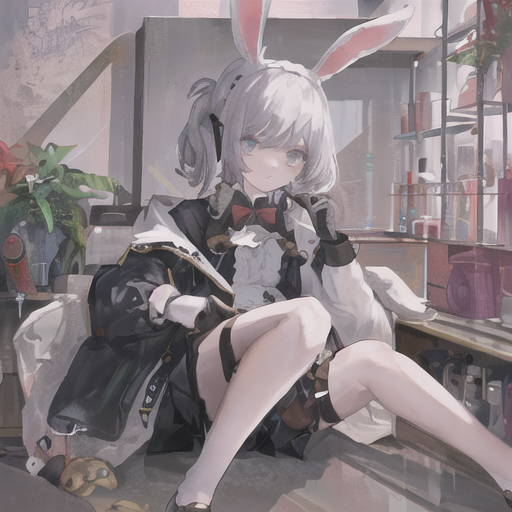

In [10]:
images[0]